# **Achievement No. 6: Advanced Analytics and Dashboard Design (VI)**

## 2026 QS World University Rankings

### **Contents**

##### 1) Importing libraries

##### 2) Importing the data set

##### 3) Data cleaning

##### 4) Decomposition

##### 5) Testing for stationarity

##### 6) Stationarizing time series data | Method: Differencing

##### 7) Rechecking the data's autocorrelations

### **1) Importing libraries**

In [36]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.
import nasdaqdatalink

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

##### **Note**

##### It looks like Quandl is now data.nasdaq.com. Therefore, I imported 'nasdaqdatalink', too.

In [37]:
# Configure API key 

nasdaqdatalink.ApiConfig.api_key = '2rstApu1SCLmnJasp3xM'

### **2) Importing the data set**

##### **Data set:** Organization of the Petroleum Exporting Countries

##### A comprehensive collection of crude oil prices declared by oil-producing countries over time 

In [38]:
data = nasdaqdatalink.get_table("QDL/OPEC")

In [39]:
data.head(15)

,date,value
None,,
0,2024-01-25,81.98
1,2024-01-24,81.05
2,2024-01-23,81.30
3,2024-01-22,79.70
4,2024-01-19,80.27
5,2024-01-18,79.39
6,2024-01-17,78.38
7,2024-01-16,79.16
8,2024-01-15,79.17


In [40]:
data.shape

(5435, 2)

In [41]:
data.columns

Index(['date', 'value'], dtype='object')

In [42]:
# Setting the 'date' column as the index and removing the 'indicator' column

data_oil = data.set_index('date')

In [43]:
data_oil.head(5)

,value
date,
2024-01-25,81.98
2024-01-24,81.05
2024-01-23,81.30
2024-01-22,79.70
2024-01-19,80.27


In [44]:
data_oil.tail(5)

,value
date,
2003-01-08,28.86
2003-01-07,29.72
2003-01-06,30.71
2003-01-03,30.83
2003-01-02,30.05


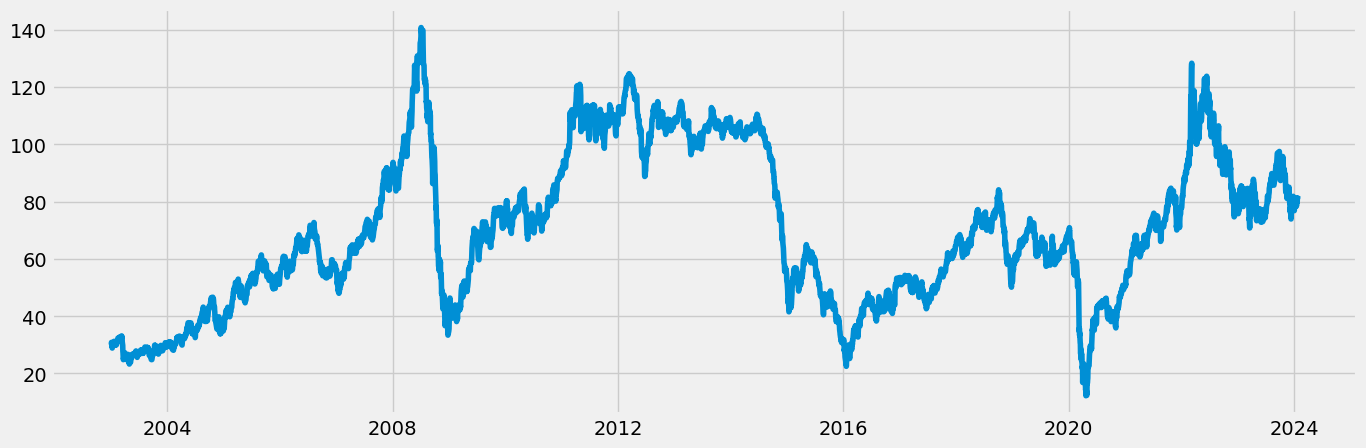

In [45]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_oil)

### **3) Data cleaning**

In [46]:
# Check for missing values 

data_oil.isnull().sum() 

value    0
dtype: int64

In [47]:
# Check for duplicates

dups = data_oil.duplicated()
dups.sum()

1367

##### **Note:** Since the 'date' column is the index, I'm going to double check, as it looks like the dups here are actually values that repeat on different dates - which is quite normal.

In [48]:
data_oil.index.duplicated().sum()

0

##### No dups!

### **4) Decomposition**

In [49]:
# This is to ensure that the data is sorted by date; so the visualization will show the most recent years on the right of the screen

data_oil = data_oil.sort_index()

In [50]:
# Since the model type is non-linear, I'll decompose the time series using a multiplicative model

decomposition = sm.tsa.seasonal_decompose(
    data_oil['value'], 
    model='multiplicative',
    period=365   # daily data → yearly seasonality
)


In [51]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

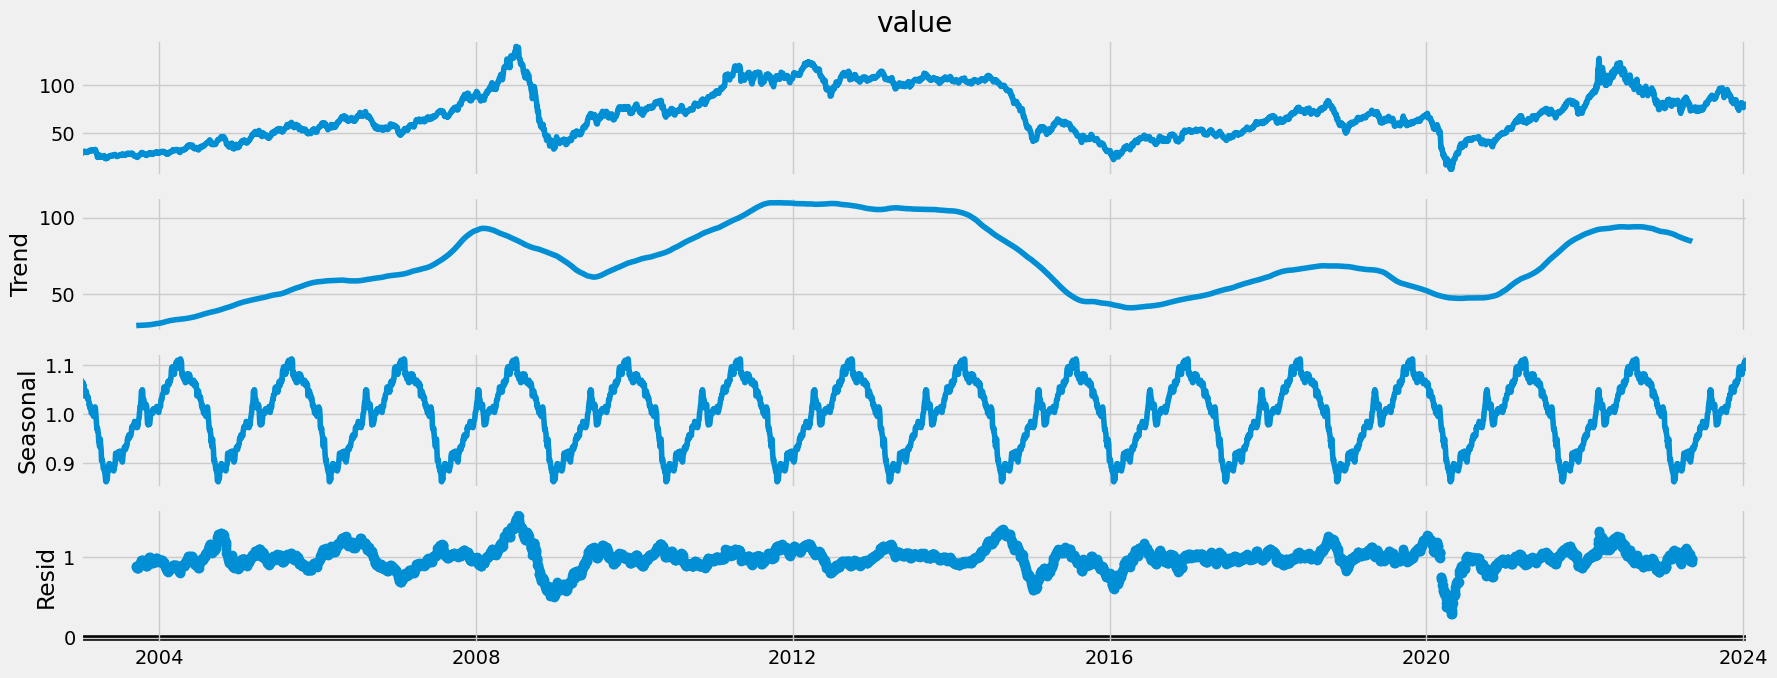

In [52]:
# Plot the separate components

decomposition.plot()
plt.show()

##### **Interpretation**

##### Trend: Non-dominant. There are periods of rise and fall. 

##### Seasonality: Present. Also, it looks regular and consistent. I can identify a clear pattern of peaks and valleys.

##### Noise: I can see noise around 2020, 2016, and 2008. The noise around 2008 could be explained by the financial crisis in the US, and the one in 2020 could be explained by the Pandemic.

### **5) Testing for stationarity**

In [53]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_oil['value'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.900015
p-value                           0.045346
Number of Lags Used              31.000000
Number of Observations Used    5403.000000
Critical Value (1%)              -3.431561
Critical Value (5%)              -2.862075
Critical Value (10%)             -2.567055
dtype: float64


##### **Interpretation of results:**

##### Test Statistic (-2.526205) > All critical values (-3.43, -2.86, -2.56)

##### p-value (0.109228) > 0.05

##### Meaning: Fail to reject the null hypothesis | The data is non-stationary

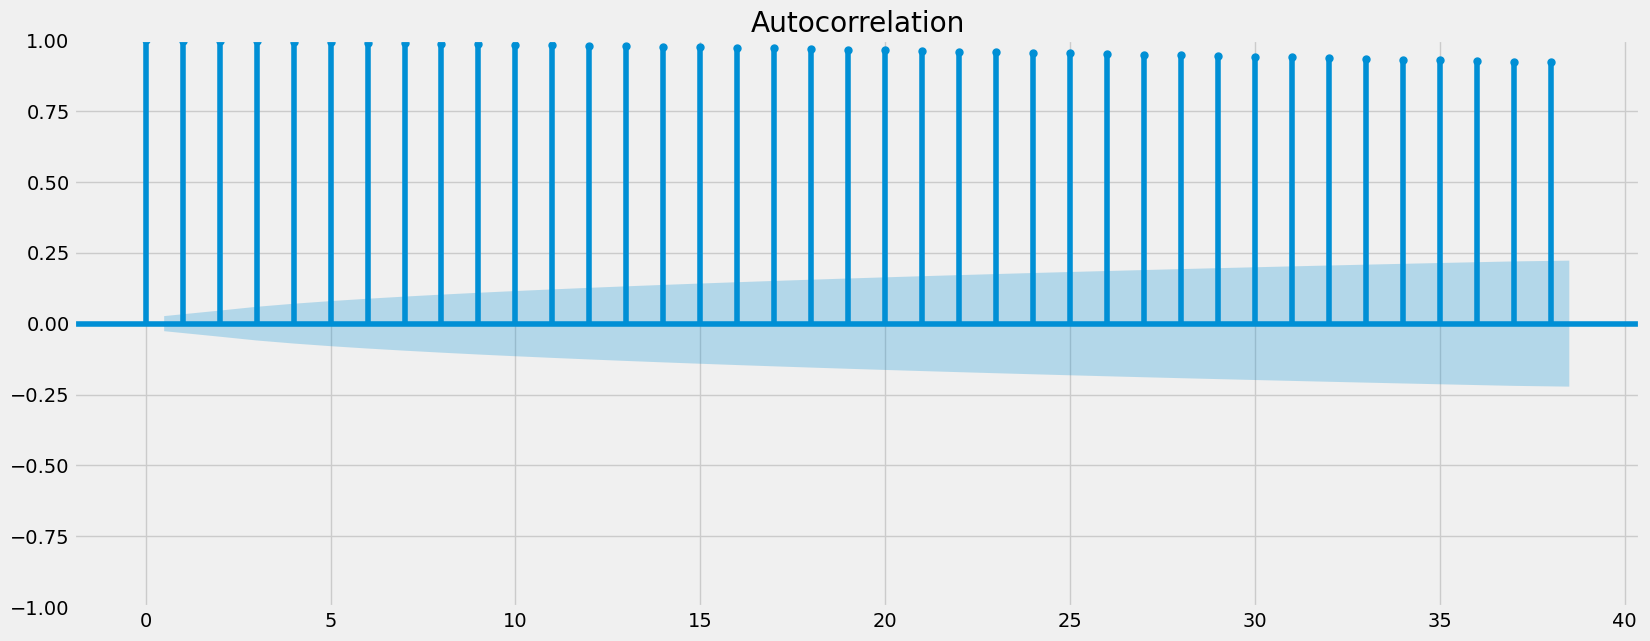

In [54]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_oil)
plt.show()

##### **Interpretation:**

##### All of the vertical lines are beyond the confidence interval, which clearly indicates that the data is non-stationary.

### **6) Stationarizing time series data | Method: Differencing**

In [55]:
data_diff = data_oil - data_oil.shift(1)

In [56]:
data_diff.dropna(inplace = True) 

In [57]:
data_diff.head()

,value
date,
2003-01-03,0.78
2003-01-06,-0.12
2003-01-07,-0.99
2003-01-08,-0.86
2003-01-09,0.65


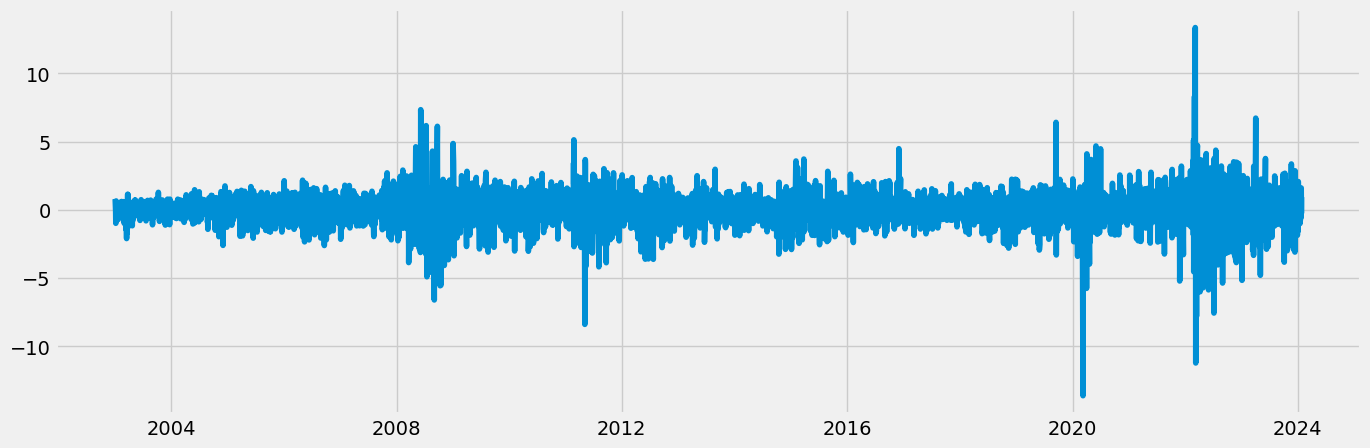

In [58]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [59]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.059548e+01
p-value                        6.366121e-19
Number of Lags Used            3.000000e+01
Number of Observations Used    5.403000e+03
Critical Value (1%)           -3.431561e+00
Critical Value (5%)           -2.862075e+00
Critical Value (10%)          -2.567055e+00
dtype: float64


##### **Interpretation:**

##### Test Statistic (-1.060230e+01) > All critical values (-3.43, -2.86, -2.56)

##### p-value (6.126643e-19) > 0.05

##### Meaning: Still failing to reject the null hypothesis | The data is non-stationary

### **New round of differencing**

In [60]:
data_diff_2 = data_diff - data_diff.shift(1)

In [61]:
data_diff_2.dropna(inplace = True) 

In [62]:
data_diff_2.head()

,value
date,
2003-01-06,-0.90
2003-01-07,-0.87
2003-01-08,0.13
2003-01-09,1.51
2003-01-10,-0.34


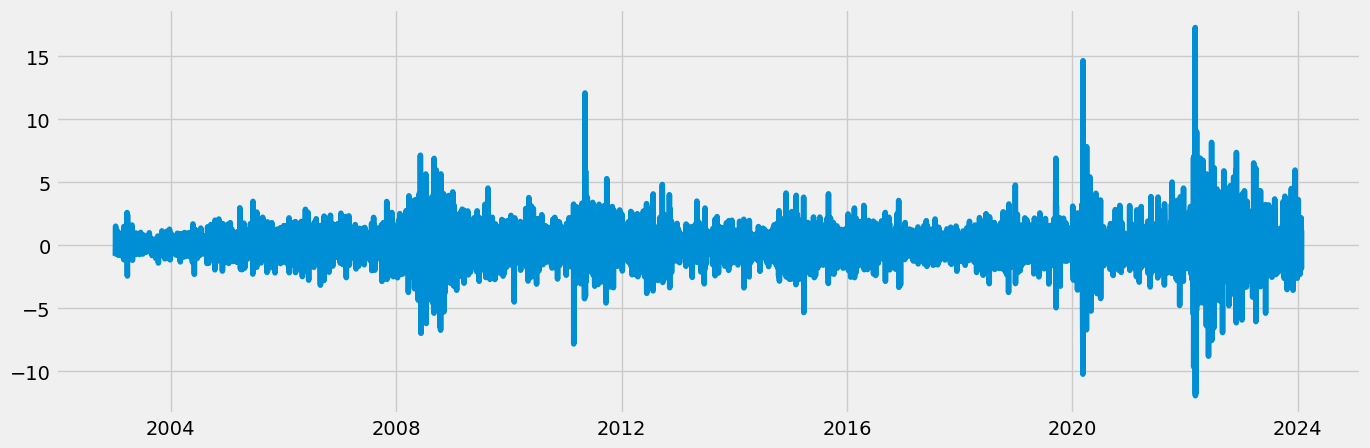

In [63]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [64]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                  -21.580029
p-value                           0.000000
Number of Lags Used              33.000000
Number of Observations Used    5399.000000
Critical Value (1%)              -3.431562
Critical Value (5%)              -2.862075
Critical Value (10%)             -2.567055
dtype: float64


##### **Interpretation:**

##### Test Statistic (-21.596785) < All critical values (-3.43, -2.86, -2.56)

##### p-value (0.000000) < 0.05

##### Meaning: I can now reject the null hypothesis | The data is stationary

### **8) Rechecking the data's autocorrelations**

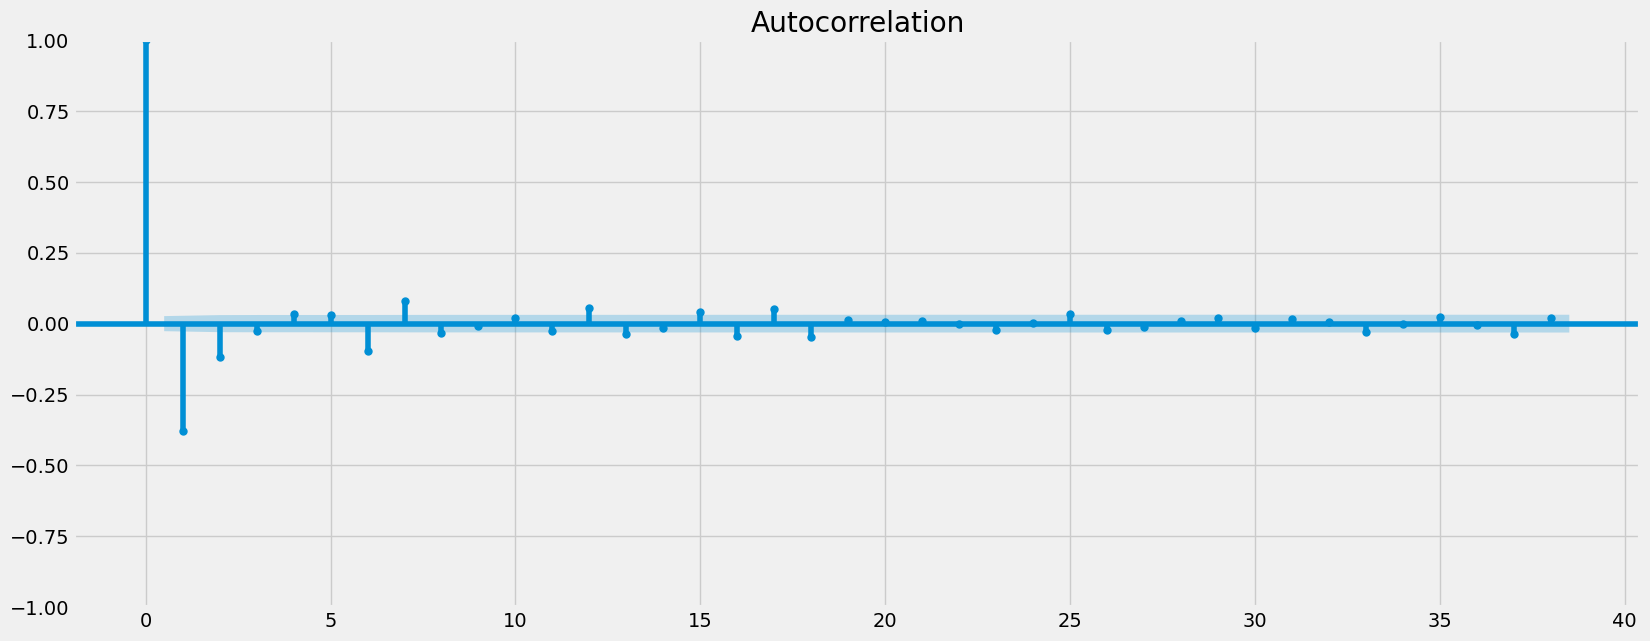

In [65]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff_2)
plt.show()

##### **Remarks**

##### After the second round of differencing, the test shows a highly significant result (p < 0.01), allowing to reject the null hypothesis and conclude that the data is stationary.

##### Autocorrelation: After the first three lags, the correlations tend to drop within the confidence bounds.

##### This indicates that the differenced series is stationary and suitable for modeling.